In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


Kalpana Regmi
Task 5 : Exploratory Data Analysis - Sports

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
match_df = pd.read_csv("/content/drive/My Drive/Grip/Indian Premier League/matches.csv")
score_df = pd.read_csv("/content/drive/My Drive/Grip/Indian Premier League/deliveries.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:

score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

Number of matches played so far :  756
Number of seasons :  12


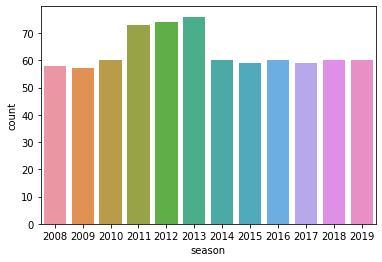

In [ ]:
sns.countplot(x='season', data=match_df)
plt.show()

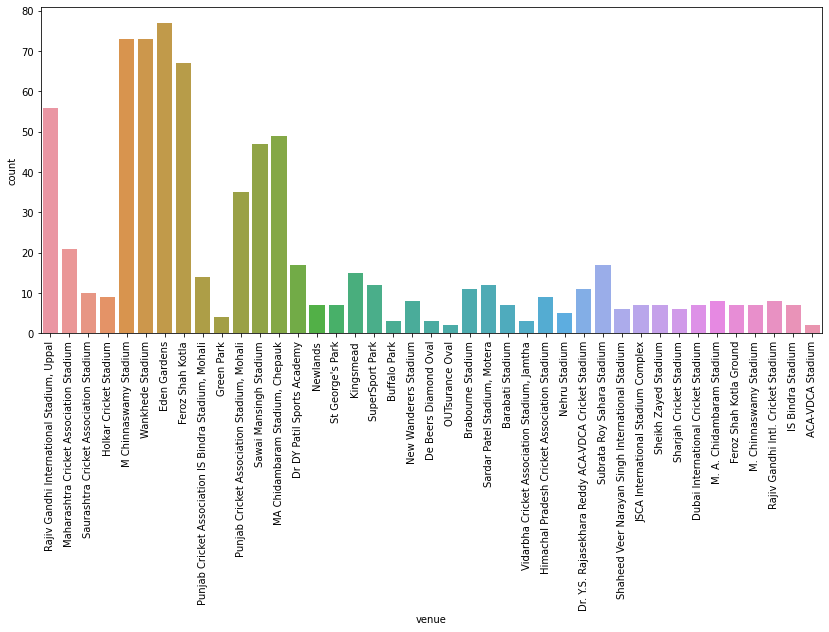

In [ ]:
#Number of matches in each venue:
plt.figure(figsize=(14,6))
sns.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

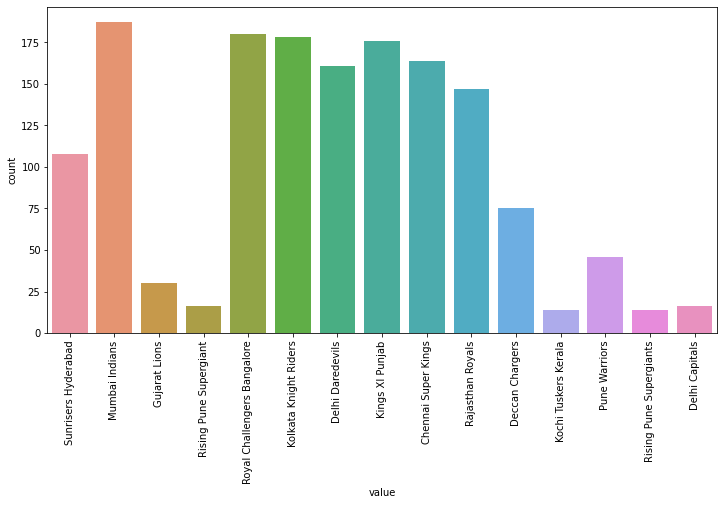

In [ ]:
#No of matches played by each team
temp_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

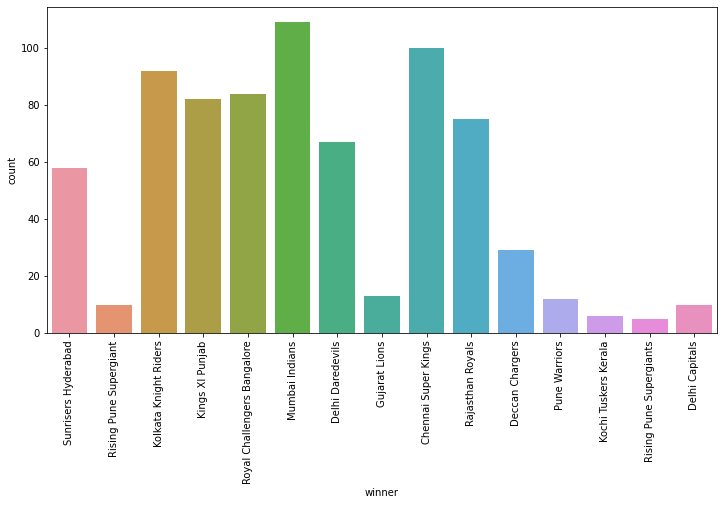

In [ ]:
#Number of wins per team:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#MI again leads the pack followed by CSK.

#Champions each season:

#Now let us see the champions in each season.
temp_df = match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


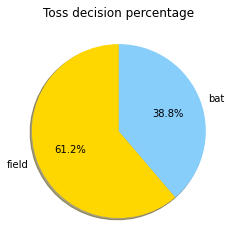

In [ ]:
#Toss decision:

#Let us see the toss decisions taken so far

temp_series = match_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

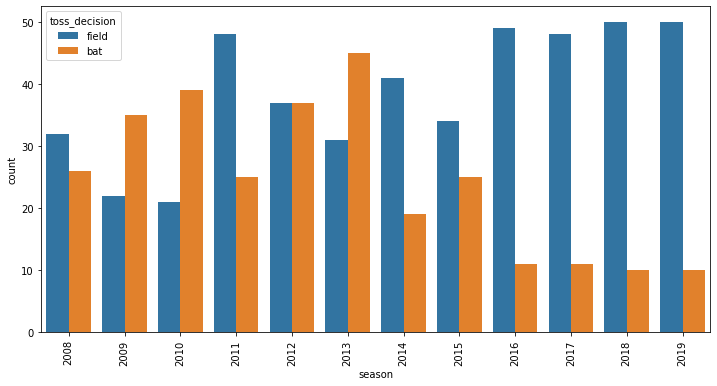

In [ ]:
#Almost 60% of the toss decisions are made to field first. Now let us see how this decision varied over season.
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

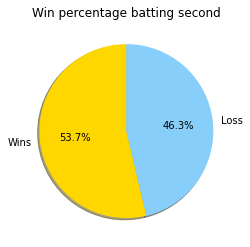

In [ ]:
#Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (match_df.win_by_wickets>0).sum()
num_of_loss = (match_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [ ]:
#So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

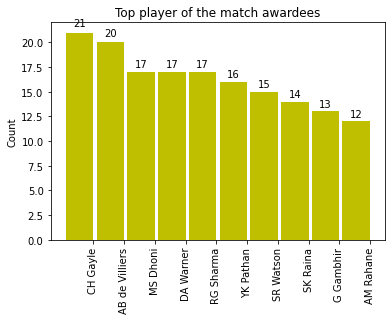

In [ ]:
#Top players of the match:

temp_series = match_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

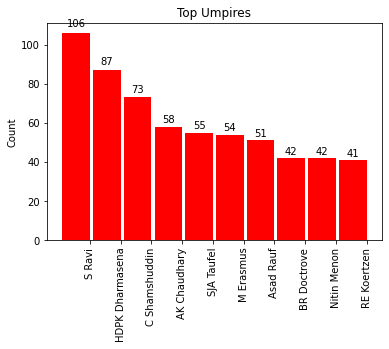

In [ ]:
#Top Umpires:
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()


In [ ]:
#So far we have looked at the match data to get insights. Now let us look at the delivery dataset which is more granular to gain some more insights. To start with, let us look at the top few rows.
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


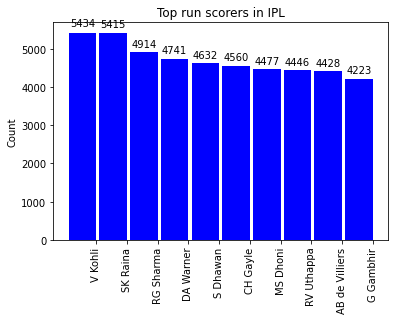

In [ ]:
#Batsman analysis:

#Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

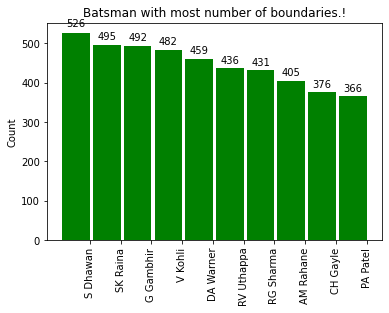

In [ ]:
#Virat Kohli is leading the chart followed closely by Raina. Gayle is the top scorer among foreign players.

#Now let us see the players with more number of boundaries in IPL.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

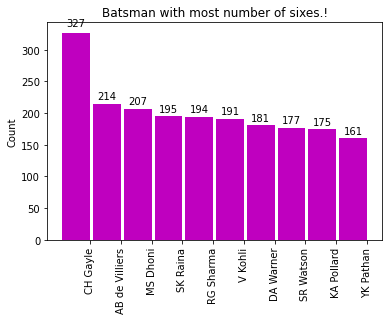

In [ ]:
#Gambhir is way ahead of others

#Now let us check the number of 6's
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

There you see the big man. Gayle, the unassailable leader in the number of sixes.

Raina is third in both number of 4's and 6's

Now let us see the batsman who has played the most number of dot balls.

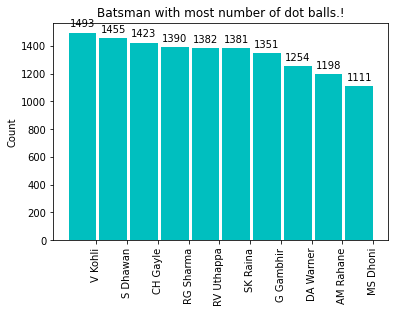

In [ ]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
autolabel(rects)
plt.show()

It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

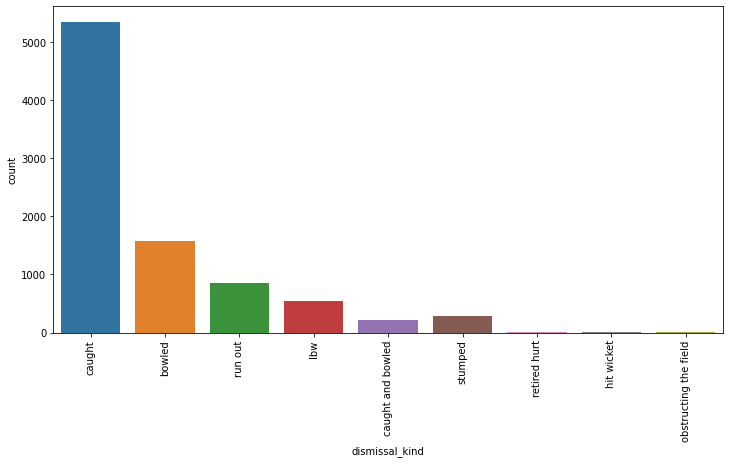

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!